# Session 7 - $Akhilesh Pai$ #

## Importing Function ##

In [1]:
# following line makes all plot output generate as images within the notebook. 
%matplotlib notebook

#importing required packages and assigning to shorter name for convenience
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image # needed to import a remote image

## Task Instructions ##

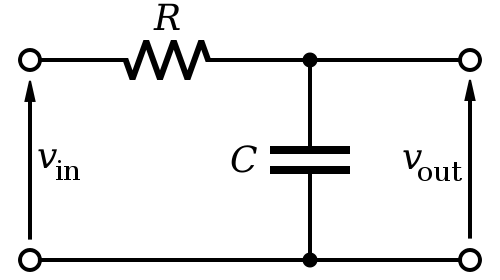

In [2]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/1st_Order_Lowpass_Filter_RC.svg/500px-1st_Order_Lowpass_Filter_RC.svg.png', embed=True)

Let $I$ be the current that flows through the resistor $R$ and into the capacitor $C$, with a charge $Q$ on the capacitor. Then we have

$$
IR = V_{\rm in} - V_{\rm out}, \\
 Q = C V_{\rm out}, \\
 I = \frac{dQ}{dt}.$$

Rearranging this gives us a first-order differential equation:
$$ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}). $$

1. Let the input signal $V_\text{in}$ be a square wave (in Volts) defined as: 
$$ V_{\rm in} = \begin{cases} 1 & \text{if } \lfloor 2t \rfloor\  \text{is even}, \\ 
-1  & \text{if } \lfloor 2t \rfloor\  \text{is odd}, \end{cases} 
$$
where the notation $\lfloor x \rfloor$ means $x$ rounded *down* to the next lowest integer, and $t$ is in units of microseconds ($\mu$s). Write a Python function to represent this mathematical function. 
     * *Hint 1: you may find the function [np.floor](http://docs.scipy.org/doc/numpy/reference/generated/numpy.floor.html) useful here.*
     * *Hint 2: A good way of determining whether an integer $n$ is odd or even is to use a construct like $(-1)^n$*
2. Check your function is working correctly by plotting it in the range $0 \leq t \leq 10 \mu$s. Make sure you include enough time points to ensure the signal is properly square.
2. Solve this using the fourth-order Runge-Kutta method by following the basic procedure we've used in this notebook, i.e.:
     * Write a function to represent the RHS of the differential equation (which will use the function for $V_{\rm in}$)
     * Either use the fourth-order Runge-Kutta function from this notebook (copy and paste, and add your own comments) or rewrite your own version.
     * Define the start and end points, initial conditions, create an array of time values and solve.
3. Plot the input square wave and the output of this (on the same plot) for the range $0\leq t \leq 10$ $\mu$s when the time constant $RC = 1 \mu$s. Repeat this for time constants $RC= 0.1$ and $0.01 \mu$s (i.e. three plots, each with an input and output line). Use the initial condition $V_\text{out} = 0 {\textrm V}$.
4. In a text cell, describe what you see and what you think the circuit is doing. *(Hint: Why do you think it is called a "low-pass filter"?)*
5. Now change the form of $V_\rm{in}$ from a square wave to a sine wave: $V_{\rm in} = \sin(2t)$. What effect does the filter have now?

## Defining $V_{in}$ Function (Square Wave) ##

In [3]:
def V_in(t): # defining 1st V_in function
    '''Definition of square wave Input function.
    Inputs: initial t-value, array of t-values (time)
    Returns: single value or array of voltages (either 1 or -1)
    '''
    x = np.floor(2*t) # rounds down all values of 2t to next lowest integer
    voltage = [] # empty array for voltages
    # for loop to cycle through rounded t values
    for i in x:
        if (-1)**i == 1: # condition for even rounded t value
            voltage.append(1) # adds 1 to voltage array
        else: # condition for odd rounded t value (if not even)
            voltage.append(-1) # adds -1 to voltage array
    return voltage

In the code cell above I have defined the input voltage function, $V_{in}$, with which a square wave will be formed depending on the value of $\lfloor2t\rfloor$. If $\lfloor2t\rfloor$ is $even$, then the input voltage will be $V_{in}=1$. If $\lfloor2t\rfloor$ is $odd$, then the input voltage will be $V_{in}=-1$.

## Defining $V_{in}$ Function (Sine Wave) ##

def V_in(t): # defining 2nd V_in function
    '''Definition of sine wave Input function.
    Inputs: initial t-value, array of t-values (time)
    Returns: single value or array of voltages
    '''
    y = np.sin(2*t) # sine function
    return y

In the code cell above I have defined the 2nd input voltage function for this task, $V_{in}=\sin(2t)$, with which a sine curve will determine the input voltage depending on the value of $t$.

## Plotting $V_{in}$ Function ##

<IPython.core.display.Javascript object>


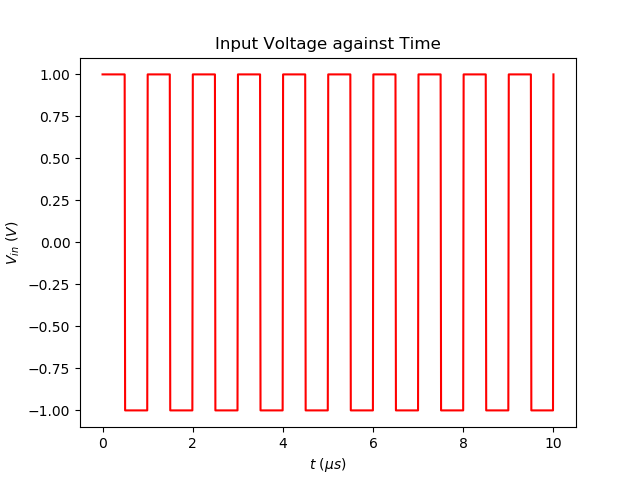

In [4]:
x = np.linspace(0.0,10.0,1000) # 1000 points between t=0 and t=10
y = V_in(x) # input voltages for corresponding t

# plots graph of square wave voltage
plt.figure()
plt.title("Input Voltage against Time")
plt.plot(x, y, 'r') # plots input as red line
plt.xlabel("$t$ $(\mu s)$")
plt.ylabel("$V_{in}$ $(V)$");

In the code cell above I have plotted the input voltage curve, depending on which function is chosen as $V_{in}$, the graph will either output a square wave voltage alternating between the values of $V_{in}=1$ and $V_{in}=-1$, or the graph will output a sine curve.

## Defining RHS of 1st-Order Differential Equation ##

In [5]:
def f(V_out,V_in): # defining RHS of the 1st-order differential
    ''' Definition of 1st-order differential function
    Inputs:
    V_out: the output voltage (initial condition)
    V_in: single value or array of input voltages
    Also "RC" (time constant) needs to be preset
    Outputs:
    f(V_out,V_in): function evaluated for V_out and V_in'''
    RHS = 1/(RC) * (V_in - V_out) # the actual function described above
    return RHS

The code cell above contains the definition of the differential equation in which $RC$ (the time constant), $V_{in}$ (the input voltage) and $V_{out}$ (the output voltage) are used to create an array of values for the right-hand side of the differential equation $ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}) $.

## Defining 4th-Order Runge-Kutta Function ##

In [6]:
def RungeKutta4(V_out,V_in): # defining 4th-order Runge-Kutta function
    '''Fourth-order Runge Kutta.
    Inputs: initial V_out, single value or array of V_in values
    Also depends on step h (global variable) and
    requires the function f(V_out,V_in) to be defined.
    Returns: single value or array of propagated xpoints'''
    xpoints = [] # a new array for the fourth-order results
    # for loop to calculate array of V_out for given V_in
    # for loop contains 4th-order Runge-Kutta equations
    for v in V_in:
        xpoints.append(V_out) # adds V_out value to xpoints array
        k1 = h*f(V_out,v)
        k2 = h*f(V_out+0.5*k1, v+0.5*h)
        k3 = h*f(V_out+0.5*k2, v+0.5*h)
        k4 = h*f(V_out+k3, v+h)
        V_out = V_out + (k1 + 2*k2 + 2*k3 + k4)/6
    return xpoints

The equations used above are:
$$
k_1 = h f(V_{out},V_{in}), \\
k_2 = h f(V_{out}+\frac{1}{2}k_1, V_{in}+\frac{1}{2}h), \\
k_3 = h f(V_{out}+\frac{1}{2}k_2, V_{in}+\frac{1}{2}h), \\
k_4 = h f(V_{out}+k_3, V_{in}+h), \\
V_{out}(V_{in}+h) = V_{out}(V_{in}) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$
which are implemented in a function as required.The method is the most useful amalgamation simplicity and accuracy, and is the most commonly used method to numerically solve differential equations.

## $RC=1\mu s=\tau$ ##

In [7]:
a = 0.0 # Start of interval
b = 10.0 # end of interval
N = 1000 # number of steps. 1000  to give smooth line
h = (b-a)/N # size of each step (dt)

The code cell above contains the initial conditions, including the start and end points, that will be used to create an array of time values (as shown below) and solve the differential equations.

<IPython.core.display.Javascript object>


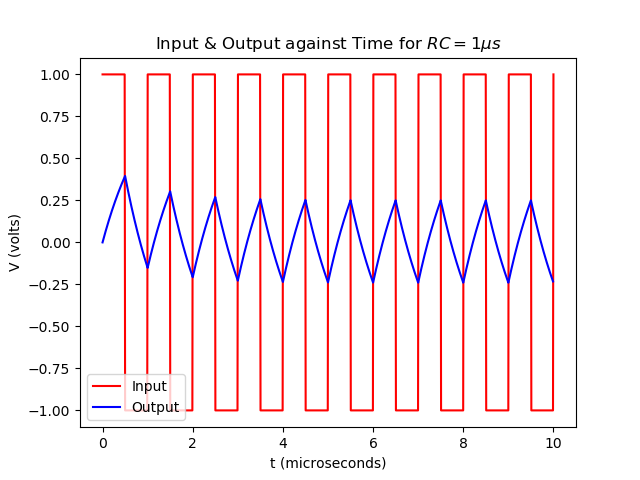

In [8]:
RC = 1 # predefined time constant (s)
V_out = 0.0 # initial condition (V)

tpoints = np.arange(a,b,h) # array of time points

xpointsRC1 = RungeKutta4(V_out,V_in(tpoints)) # array of output values for Runge-Kutta (plotted against time)

# plots the input and output on same plot, both against time
plt.figure()
plt.title("Input & Output against Time for $RC=1\mu s$")
plt.plot(x, y, 'r', label="Input") # plots input voltage as red line
plt.plot(tpoints, xpointsRC1, 'b', label="Output") # plots output voltage as blue line
plt.legend(loc="lower left")
plt.xlabel("t (microseconds)")
plt.ylabel("V (volts)");

Square Wave:

In the code cell above I have used the 4th-order Runge-Kutta method to solve the differential equation for a time constant of $RC=1\mu s$. I notice that the peaks of the output signal $ (~0.25V) $ is much smaller than the peaks of the input signal $ (1V) $. While the input voltage is at its maximum positive value of $ 1V $, the output voltage increases at a near-linear rate, until the time at which the input voltage drops to the maximum negative value of $ -1V $, at which point the output voltage drops at a near-linear rate until the input voltage once again rises to $ 1V $.

Sine Wave:

By changing the $ V_{in} $ to a sine wave, the output voltage appears to be damped as expected from the previous input square wave. This shows that there is energy being lost in the circuit. Furthermore output voltage is phase shifted by $ \frac{\pi}{2} $ radians to the right.

## $RC=0.1\mu s=\tau$ ##

<IPython.core.display.Javascript object>


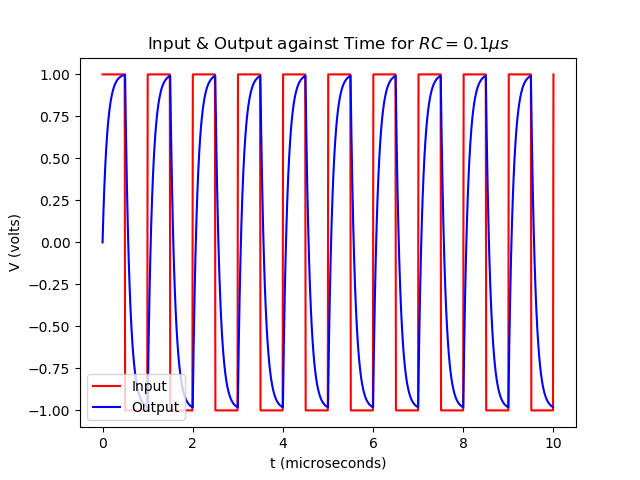

In [9]:
RC = 0.1 # predefined time constant (s)
V_out = 0.0 # initial condition (V)

xpointsRCp1 = RungeKutta4(V_out,V_in(tpoints))

plt.figure()
plt.title("Input & Output against Time for $RC=0.1\mu s$")
plt.plot(x, y, 'r', label="Input") # plots input voltage as red line
plt.plot(tpoints, xpointsRCp1, 'b', label="Output") # plots output voltage as blue line
plt.legend(loc="lower left")
plt.xlabel("t (microseconds)")
plt.ylabel("V (volts)");

Square Wave:

In the code cell above I have used the 4th-order Runge-Kutta method to solve the differential equation for a time constant of $RC=0.1\mu s$. I notice that the peaks of the output signal now match the peaks of the input signal. While the input voltage is at its maximum positive value of $ 1V $, the output voltage initially increases at a near-linear rate, but at output voltages very close to the value of the input voltage, the rate of increase of $V_{out}$ with respect to time decreases. So $V_{out}$ plateaus and reaches a maximum of $ 1V $. This is repeated when the input voltage changes to $ -1V $, and the $V_{out}$ decreases at a near-linear rate initially and then the rate of decrease (negative increase) decreases and plateaus until the output voltage is $ -1V $. Furthermore I notice that there is less damping for lower values of $RC$ (the time constant), which may be due to the lower resistance meaning that less energy is lost through the resistor in the circuit.

Sine Wave:

By changing the $ V_{in} $ to a sine wave, the output voltage very closely matches the input voltage but there does appear to be a small amount of damping still as the peaks of the input and output voltage curves do not line up, in addition to a small phase shift of the output voltage curve to the right.

## $RC=0.01\mu s=\tau$ ##

<IPython.core.display.Javascript object>


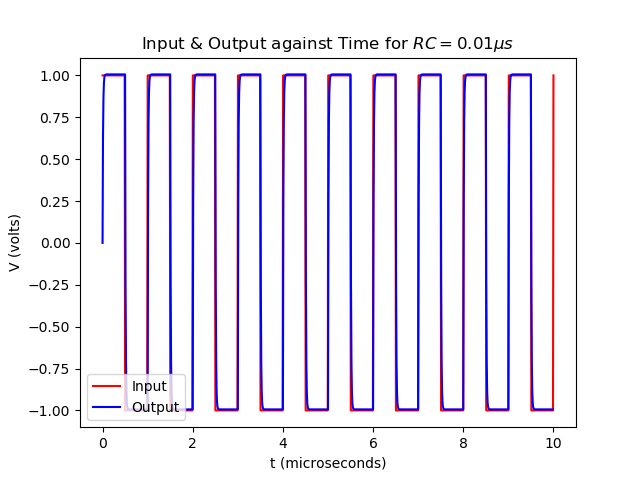

In [10]:
RC = 0.01 # predefined time constant (s)
V_out = 0.0 # initial condition (V)

xpointsRCp01 = RungeKutta4(V_out,V_in(tpoints))

plt.figure()
plt.title("Input & Output against Time for $RC=0.01\mu s$")
plt.plot(x, y, 'r', label="Input") # plots input voltage as red line
plt.plot(tpoints, xpointsRCp01, 'b', label="Output") # plots output voltage as blue line
plt.legend(loc="lower left")
plt.xlabel("t (microseconds)")
plt.ylabel("V (volts)");

Square Wave:

In the code cell above I have used the 4th-order Runge-Kutta method to solve the differential equation for a time constant of $RC=0.01\mu s$. I notice that the input and output voltages now almost exactly match. When the input voltage is at its maximum voltage of $ 1V $, the output voltage seems to increase almost instantly to become $ 1V $, however it is still possible to see that the line representing output voltage is slightly curved still right before the output voltage reaches its maximum of $ 1V $ (meaning that it is not a linear increase in $V_{out}$). This is the same for when the input voltage is at $-1V$. Also there does not appear to be very much damping at all, so little/no energy is lost in the circuit.

Sine Wave:

By changing the $ V_{in} $ to a sine wave, the output voltage now almost exactly matches the input voltage with no damping or phase shift. Therefore little/no energy is lost within the circuit through the resistor. Therefore for the lowest time constant of $RC=0.01\mu s$, there is input and output curves match almost exactly. Therefore the resistor in the low-pass filter reduces the amplitude of the output voltage.

Furthermore after changing the sine wave to have a very high frequency and a very low frequency by changing the sine wave to $V_{in}=\sin(10t)$ and $V_{in}=\sin(1t)$ respectively, I noticed that for high frequencies were damped a lot more than lower frequencies. This is because for lower frequencies, the amplitude of the input and output voltage curves were very close even for $RC=1\mu s$, whereas for high frequencies the difference in amplitude between the input and output voltages were much more different.

Therefore this leads me to conclude that a low-pass filter only allows low frequency signals from $ 0Hz $ to a predetermined cut-off frequency that may be defined by the time constant of the circuit ($RC$). Any frequencies greater than the cut-off frequency, defined by the time constant, are blocked by the circuit.

Completed!